# 🌍 Global Cancer Patients Severity Prediction

## 📌 Problem Statement
## Predict the severity score of cancer patients using global health, lifestyle, and medical data.


## 1. Import Necessary Libraries

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn

## 2. Load the Dataset

In [26]:
df = pd.read_csv('global_cancer_patients_2015_2024 (1).csv')
df 

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


## 3. information About The Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

## 4. Select Numeric Columns 

In [4]:
df_numeric = df.select_dtypes(include = 'number')
df_numeric

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,2021,6.4,2.8,9.5,0.9,8.7,62913.44,5.9,4.92
1,34,2021,1.3,4.5,3.7,3.9,6.3,12573.41,4.7,4.65
2,80,2023,7.4,7.9,2.4,4.7,0.1,6984.33,7.1,5.84
3,40,2015,1.7,2.9,4.8,3.5,2.7,67446.25,1.6,3.12
4,43,2017,5.1,2.8,2.3,6.7,0.5,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...
49995,80,2023,2.3,7.5,2.8,3.8,2.9,71463.70,1.0,3.63
49996,40,2018,6.4,3.5,2.9,9.0,9.8,49619.66,0.4,6.03
49997,74,2015,6.2,1.6,8.7,4.7,4.0,5338.25,2.7,6.02
49998,21,2018,4.0,6.5,7.6,8.6,8.1,45100.47,7.5,6.54


In [5]:
df['Country_Region'].unique()

array(['UK', 'China', 'Pakistan', 'Brazil', 'Germany', 'Canada', 'USA',
       'India', 'Australia', 'Russia'], dtype=object)

In [6]:
df['Country_Region'].nunique()

10

In [7]:
df['Cancer_Type'].nunique()

8

In [8]:
df['Cancer_Type'].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [9]:
df['Cancer_Stage'].nunique()

5

In [10]:
df['Cancer_Stage'].unique()

array(['Stage III', 'Stage 0', 'Stage II', 'Stage I', 'Stage IV'],
      dtype=object)

## 5. Exploratory Data Analysis 

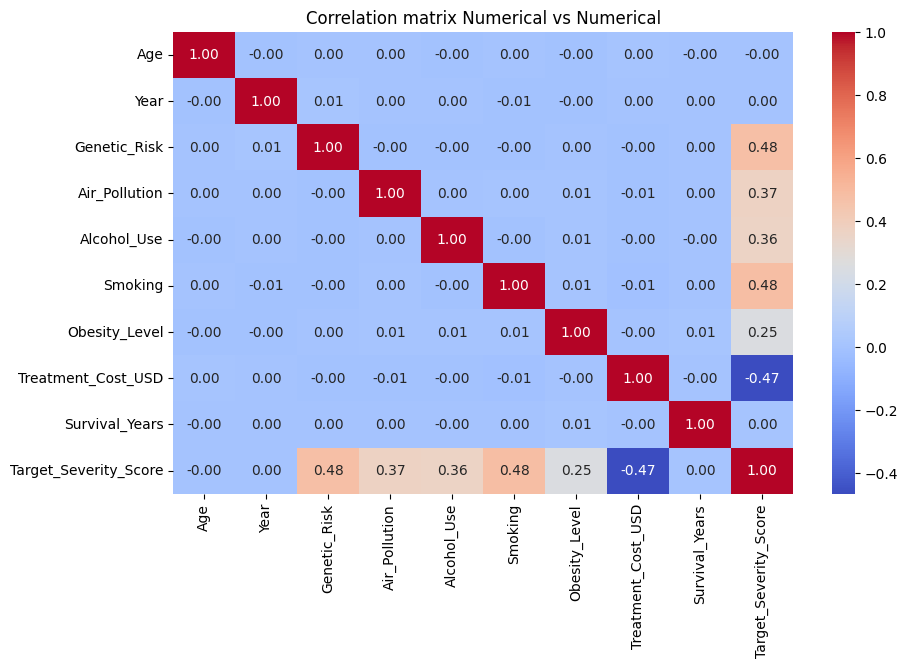

In [11]:
correlation_matrix = df_numeric.corr()
plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix,cmap = 'coolwarm',annot=True,fmt = '.2f')
plt.title("Correlation matrix Numerical vs Numerical")
plt.show()

### Distribution among Numerical Columns  

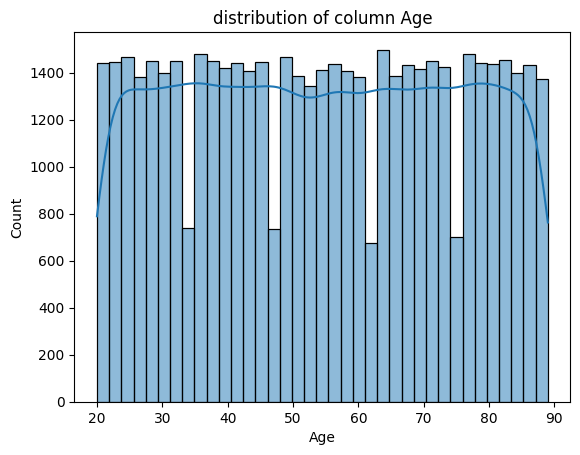

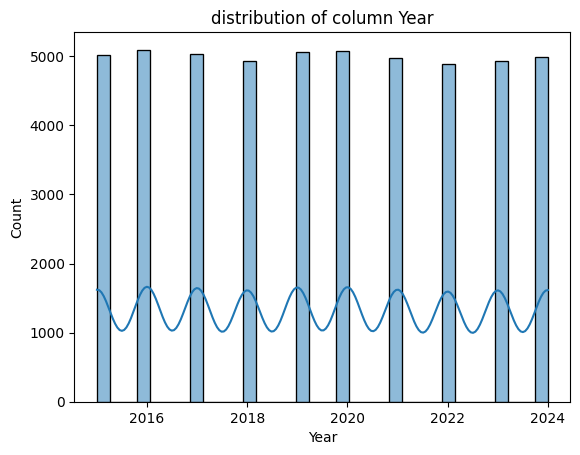

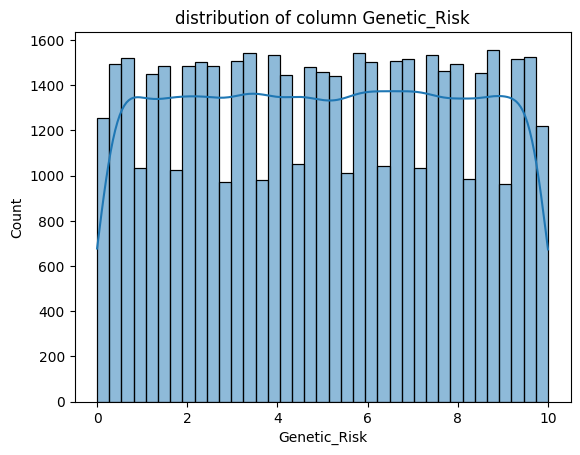

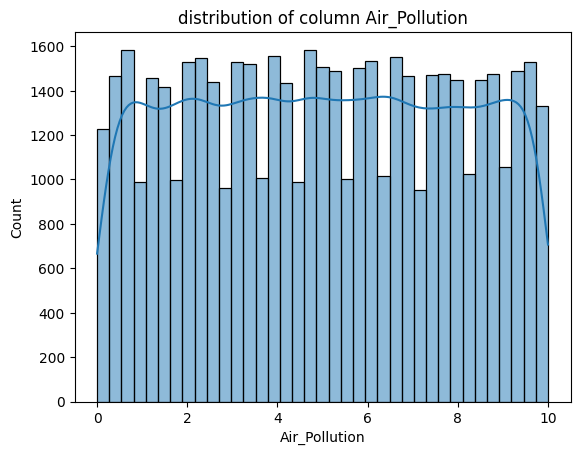

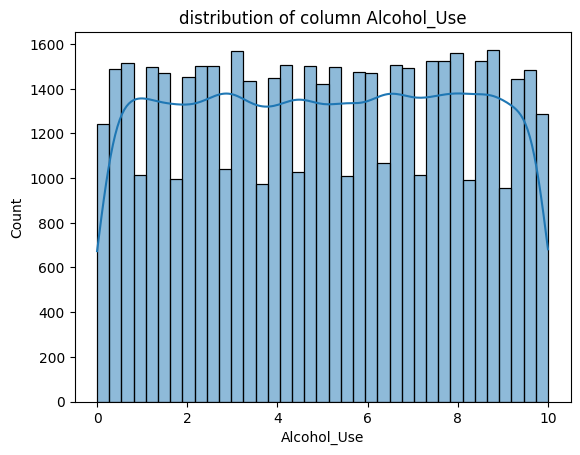

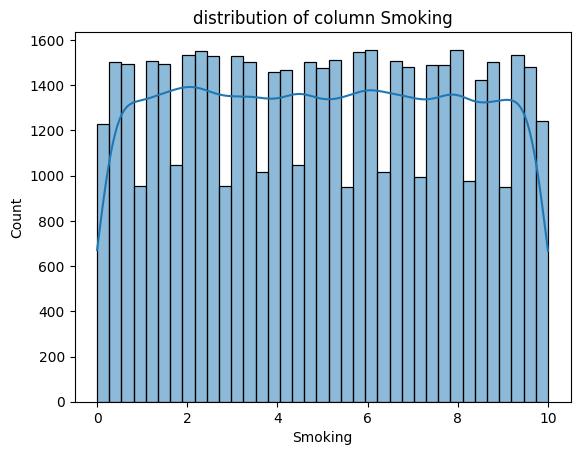

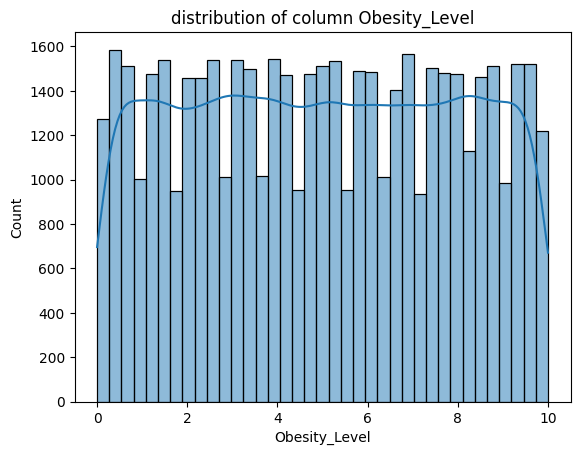

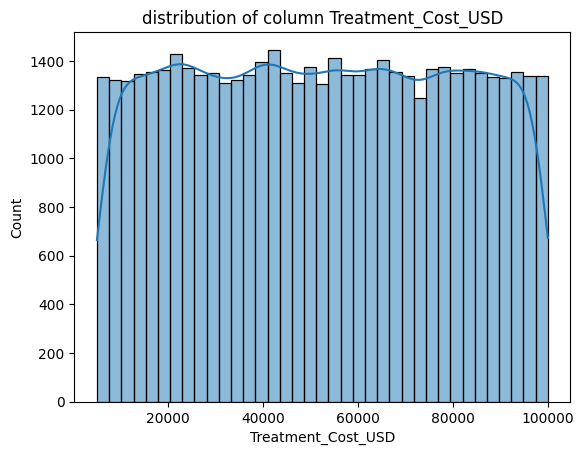

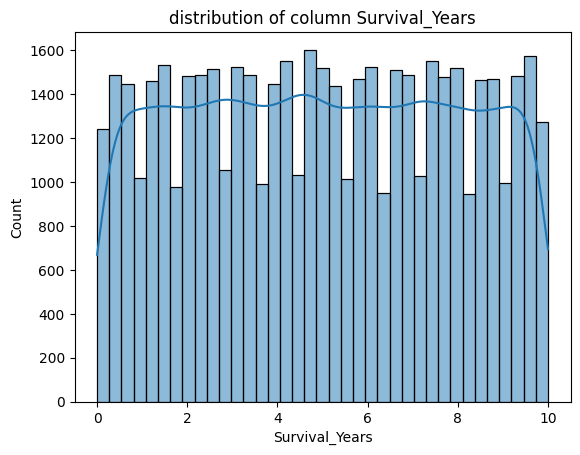

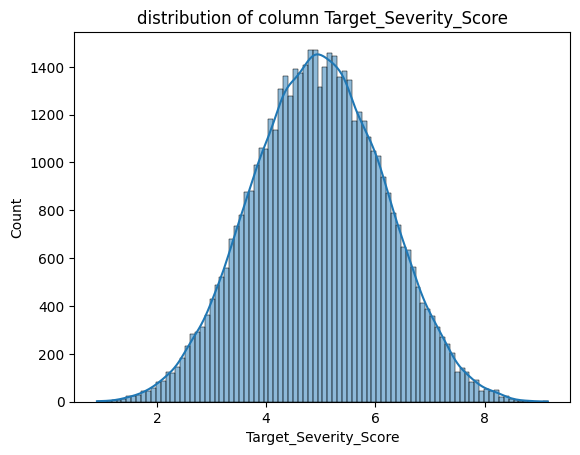

In [12]:
for col in df_numeric:
    sns.histplot(df[col],kde = True)
    plt.title(f'distribution of column {col}')
    plt.show()

### Distribution among Categorical Columns

<Axes: xlabel='Gender', ylabel='count'>

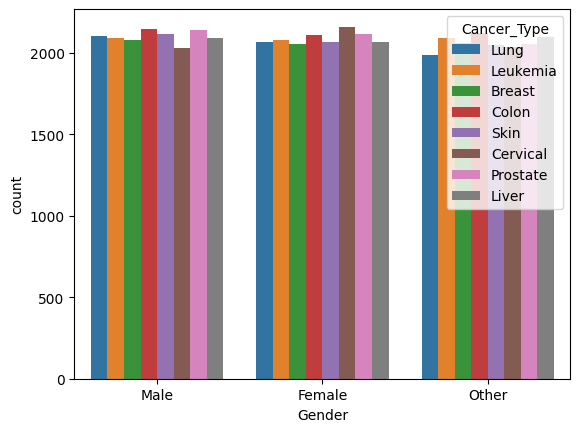

In [14]:
sns.countplot(x='Gender', hue='Cancer_Type', data=df)

<Axes: xlabel='Gender', ylabel='count'>

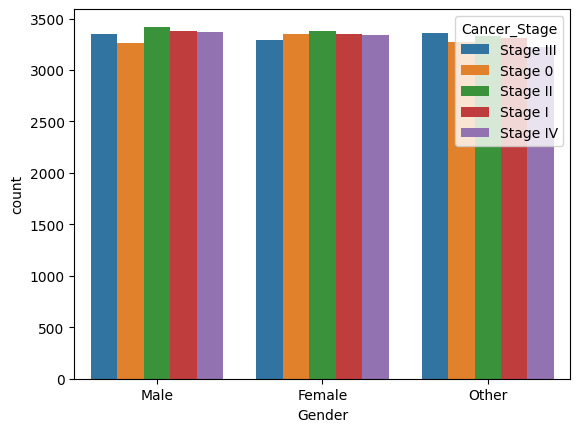

In [15]:
sns.countplot(x='Gender', hue='Cancer_Stage', data=df)

<Axes: xlabel='Cancer_Type', ylabel='count'>

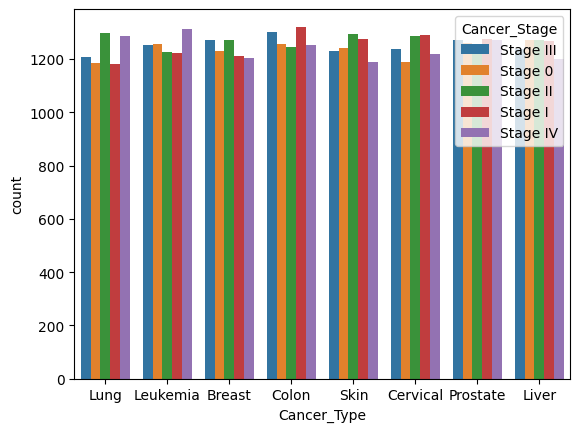

In [16]:
sns.countplot(x='Cancer_Type', hue='Cancer_Stage', data=df)

## 6. Separate The Independent Variable and Dependent Variable

In [21]:
X = df.drop(columns=["Patient_ID", "Target_Severity_Score"])
y = df["Target_Severity_Score"]

## 7. Important Necessary Algorithm Related This dataset

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from category_encoders import CountEncoder
from sklearn.linear_model import LinearRegression



## 8. Separate the Training and Testing Data

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

## 9. encode the Categorical Columns 

In [29]:
numeric_cols = ["Age",'Year','Genetic_Risk','Air_Pollution','Alcohol_Use','Smoking','Obesity_Level','Treatment_Cost_USD','Survival_Years']
categoric_cols = ['Gender']
ordinal_encoders = ['Cancer_Stage']
count = ['Cancer_Type','Country_Region']

In [37]:
cancer_stage = [['Stage 0','Stage I','Stage II', 'Stage III','Stage IV']]
      

## 10. Make obeject of the Class 

In [38]:
ordinal = OrdinalEncoder(categories=cancer_stage)
one_hot = OneHotEncoder()
count_encoder = CountEncoder()
scaler = StandardScaler()


## 11. Using ColumnTransformer for processing diffrent columns 

In [39]:
preprocessor = ColumnTransformer(
    transformers =[
        ('onehot',one_hot,categoric_cols),
        ('count',count_encoder,count),
        ('ordinal',ordinal,ordinal_encoders),
        ('scaling',scaler,numeric_cols),
    ])
        
    
    

In [52]:
rf = RandomForestRegressor(n_estimators=100,criterion='squared_error', max_depth=None)
lr = LinearRegression()

## 12. using Pipeline


In [61]:
pipeline = Pipeline(
    steps = [
        ('preprocessor',preprocessor),
        ('rf',rf)
    ])
    
    

In [69]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['Gender']),
                                                 ('count',
                                                  CountEncoder(combine_min_nan_groups=True),
                                                  ['Cancer_Type',
                                                   'Country_Region']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Stage '
                                                                              '0',
                                                                              'Stage '
                                                                              'I',
                                                                              'Stage '
                                                                              'II',
                                                                              'Stage '
                                                                              'III',
                                                                              'Stage '
                                                                              'IV']]),
                                                  ['Cancer_Stage']),
                                                 ('scaling', StandardScaler(),
                                                  ['Age', 'Year',
                                                   'Genetic_Risk',
                                                   'Air_Pollution',
                                                   'Alcohol_Use', 'Smoking',
                                                   'Obesity_Level',
                                                   'Treatment_Cost_USD',
                                                   'Survival_Years'])])),
                ('rf', RandomForestRegressor())])

In [70]:
y_pred = pipeline.predict(X_test)

In [71]:
y_pred

array([7.1175, 3.969 , 5.7969, ..., 3.3815, 3.2291, 3.1818],
      shape=(10000,))

In [72]:
y_pred_train = pipeline.predict(X_train)

In [73]:
y_pred_train

array([4.6495, 2.7487, 4.4017, ..., 4.9145, 5.5535, 4.4962],
      shape=(40000,))

## 13. Check accuracy Of Training and Testing Dataset

In [74]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))


0.979202305628136
0.13601089
0.029550767265000014


In [75]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_train,y_pred_train))
print(mean_absolute_error(y_train,y_pred_train))
print(mean_squared_error(y_train,y_pred_train))


0.99691532063121
0.05252632500000003
0.0044534918110000045


## 14. Plot Regression Line

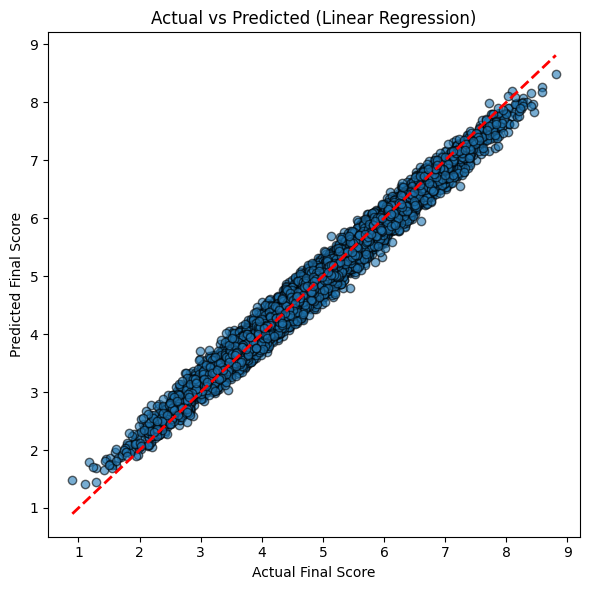

In [76]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Actual vs Predicted (RandomForestregressor)')
plt.tight_layout()
plt.show()